In [23]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt


In [24]:
moviesDF = pd.read_csv('scores/all_scores.csv')

In [25]:
moviesDF.head(5)

,title,tomato_score,audience_score,release_date,runtime,rating,genre,cast,studio,director
0,Many Adventures of Winnie the Pooh (1977),100,88,1977-03-10 16:00:00-08:00,74,G,"['Animation', 'Comedy', 'Kids & Family', 'Musi...","['Sterling Holloway', 'Paul Winchell', 'Junius...",Walt Disney Productions,"['Wolfgang Reitherman', 'John Lounsbery']"
1,Toy Story 2 (1999),100,86,1999-11-23 16:00:00-08:00,92,G,"['Animation', 'Comedy', 'Kids & Family']","['Tim Allen', 'Joan Cusack', 'Kelsey Grammer',...",Buena Vista Pictures,['John Lasseter']
2,The Odd Couple (1968),100,89,1967-12-31 16:00:00-08:00,105,PG,"['Classics', 'Comedy', 'Drama']","['Walter Matthau', 'Jack Lemmon', 'Monica Evan...",Paramount Home Video,['Gene Saks']
3,Old Yeller (1957),100,79,1957-12-24 16:00:00-08:00,84,G,"['Action & Adventure', 'Classics', 'Drama', 'K...","['Dorothy McGuire', 'Tommy Kirk', 'Kevin Corco...",Buena Vista Pictures,['Robert Stevenson']
4,On a Clear Day You Can See Forever (1970),100,75,1969-12-31 16:00:00-08:00,129,G,"['Classics', 'Comedy', 'Drama', 'Musical & Per...","['Barbra Streisand', 'Yves Montand', 'Bob Newh...",Paramount Pictures,['Vincente Minnelli']


In [26]:
#I actually first want the average tomato score of anime movies 
moviesDFGenres = moviesDF.genre
print(moviesDFGenres)


0        ['Animation', 'Comedy', 'Kids & Family', 'Musi...
1                 ['Animation', 'Comedy', 'Kids & Family']
2                          ['Classics', 'Comedy', 'Drama']
3        ['Action & Adventure', 'Classics', 'Drama', 'K...
4        ['Classics', 'Comedy', 'Drama', 'Musical & Per...
                               ...                        
15960                      ['Drama', 'Mystery & Suspense']
15961                                           ['Comedy']
15962    ['Animation', 'Art House & International', 'Ki...
15963                                           ['Comedy']
15964                      ['Drama', 'Mystery & Suspense']
Name: genre, Length: 15965, dtype: object


In [27]:
AnimeTrues = moviesDFGenres.map(lambda genre: 'Anime & Manga' in genre)
animeMovies = moviesDF.loc[ (AnimeTrues) ]

In [28]:
animeTomatoMean = animeMovies.tomato_score.mean()
animeAudienceMean = animeMovies.audience_score.mean()
animeMovies.describe()

,tomato_score,audience_score,runtime
count,10.000000,10.000000,10.000000
mean,65.100000,71.300000,101.300000
std,26.685202,12.579083,12.789318
min,16.000000,53.000000,79.000000
25%,57.250000,60.250000,98.250000
50%,70.500000,76.000000,103.500000
75%,82.250000,79.750000,109.250000
max,96.000000,89.000000,121.000000


In [29]:
animeMovies.groupby('studio').size()


studio
Eleven Arts                         1
GKIDS                               3
Geneon Entertainment                1
Go Fish Pictures                    1
Miramax Films                       1
Palm Pictures                       1
Pioneer                             1
Sony Pictures Home Entertainment    1
dtype: int64

I am getting the every genre that is in this csv and then adding it to the set genres that way we have every genre

In [30]:
genres = set()
for index,movie in moviesDF.iterrows():
    firstApost = -1
    secondApost = 0
    while secondApost != -1:
        firstApost = movie.genre.find('\'',firstApost+1)
        secondApost = movie.genre.find('\'',firstApost+1)
        thisGenre = movie.genre[firstApost+1:secondApost]
        if(secondApost != -1 and not(thisGenre in genres)):
            print(thisGenre)
            genres.add(thisGenre)
print(genres)

Animation
, 
Comedy
Kids & Family
Musical & Performing Arts
Classics
Drama
Action & Adventure
Western
Science Fiction & Fantasy
Documentary
Television
Romance
Mystery & Suspense
Art House & International
Horror
Faith & Spirituality
Special Interest
Sports & Fitness
Cult Movies
Gay & Lesbian
Anime & Manga
{'Kids & Family', 'Anime & Manga', 'Animation', 'Comedy', 'Faith & Spirituality', 'Romance', ', ', 'Television', 'Cult Movies', 'Mystery & Suspense', 'Documentary', 'Sports & Fitness', 'Drama', 'Special Interest', 'Horror', 'Western', 'Musical & Performing Arts', 'Art House & International', 'Action & Adventure', 'Classics', 'Gay & Lesbian', 'Science Fiction & Fantasy'}


In [31]:
#There was a genre that was just a comma so i removed it
genres.remove(', ')
print (genres)

{'Kids & Family', 'Anime & Manga', 'Animation', 'Comedy', 'Faith & Spirituality', 'Romance', 'Television', 'Cult Movies', 'Mystery & Suspense', 'Documentary', 'Sports & Fitness', 'Drama', 'Special Interest', 'Horror', 'Western', 'Musical & Performing Arts', 'Art House & International', 'Action & Adventure', 'Classics', 'Gay & Lesbian', 'Science Fiction & Fantasy'}


In [32]:
#genres now has every movie in it 
#I think I will get the rows for every movie in each genre put in it with a dictionary
moviesOfGenre = dict()
for genre in genres:
    genreTrues = moviesDFGenres.map(lambda genre2: genre in genre2)
    genreMovies = moviesDF.loc[ (genreTrues) ]
    moviesOfGenre.update({genre:genreMovies})    

Getting average tomato score rating and audience score rating for every genre then putting them into a dataframe that way I can graph the ratings based on the genre. I can get other stats for the genre movies just by editting this a little

In [33]:
movieGenreStats = pd.DataFrame({'genre':'','tomato_score_mean':'','audience_score_mean':''},index=[])
for movieGenre,movieGenreDF in moviesOfGenre.items():
#     print(f'Stats for genre {movieGenre}')
    tomatoMean = movieGenreDF.tomato_score.mean()
    audienceMean = movieGenreDF.audience_score.mean()
    tinyDF = pd.DataFrame({'genre':movieGenre,'tomato_score_mean':tomatoMean,'audience_score_mean':audienceMean},index=[0])
    #print(tinyDF.head())
    movieGenreStats = movieGenreStats.append(tinyDF,ignore_index=True)
#     print(movieGenreStats.head())

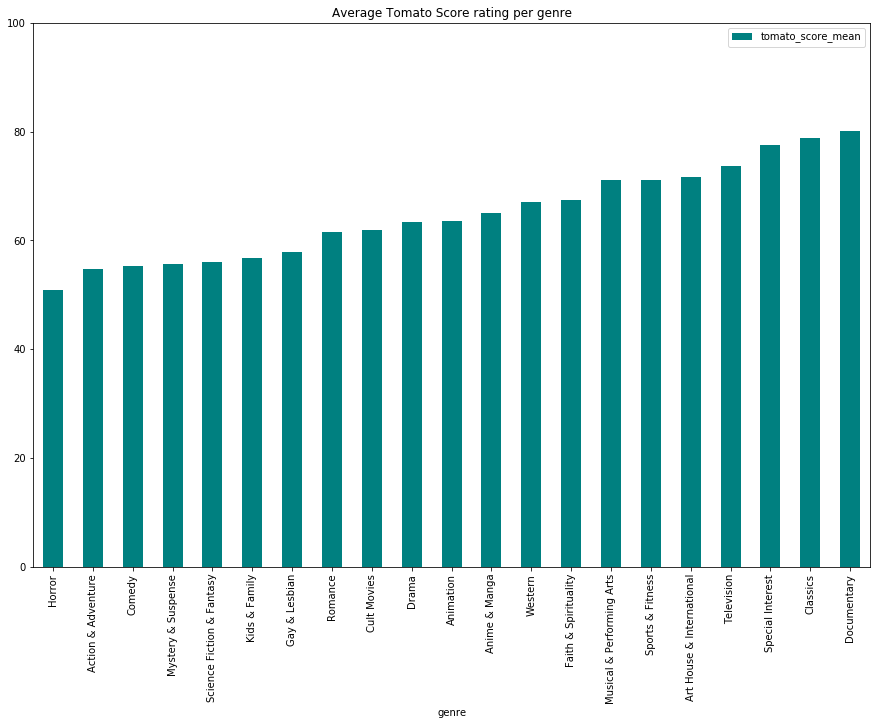

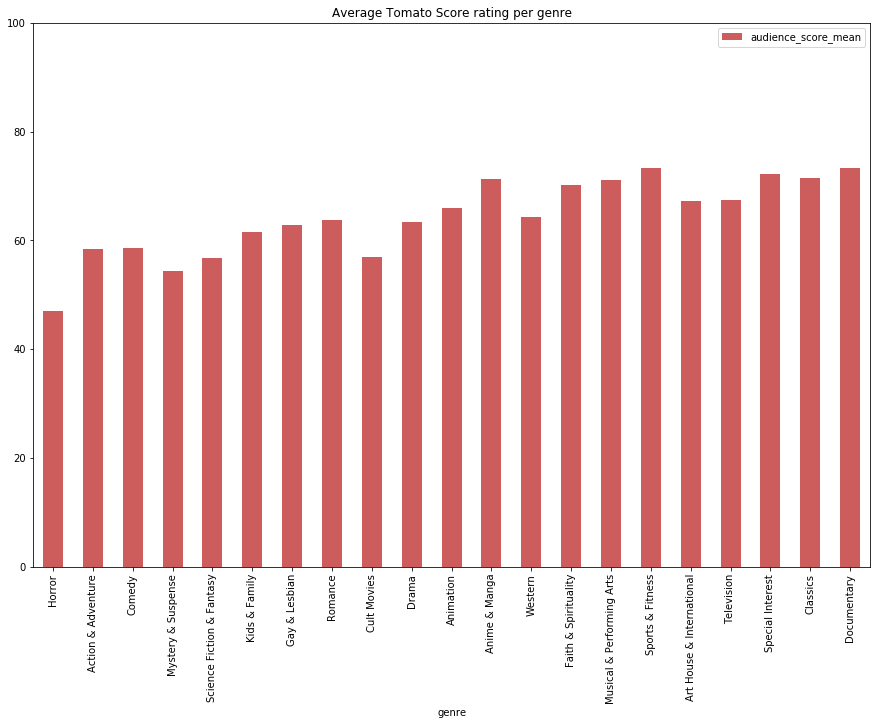

In [34]:
movieGenreStats.sort_values('tomato_score_mean',inplace=True)
movieGenreStats.plot(x="genre",y='tomato_score_mean',kind='bar',title='Average Tomato Score rating per genre',figsize=(15, 10), color='Teal', ylim=(0,100))
movieGenreStats.plot(x="genre",y='audience_score_mean',kind='bar',title='Average Tomato Score rating per genre',figsize=(15, 10), color='IndianRed', ylim=(0,100))

In [35]:
for genre in moviesOfGenre:
    print(moviesOfGenre[genre].head())

                                       title  tomato_score  audience_score  \
0  Many Adventures of Winnie the Pooh (1977)           100              88   
1                         Toy Story 2 (1999)           100              86   
3                          Old Yeller (1957)           100              79   
5  Darby O'Gill and the Little People (1959)           100              77   
6                        The Yearling (1946)           100              77   

                release_date  runtime rating  \
0  1977-03-10 16:00:00-08:00       74      G   
1  1999-11-23 16:00:00-08:00       92      G   
3  1957-12-24 16:00:00-08:00       84      G   
5  1959-06-25 17:00:00-07:00       93      G   
6  1946-12-17 16:00:00-08:00      128      G   

                                               genre  \
0  ['Animation', 'Comedy', 'Kids & Family', 'Musi...   
1           ['Animation', 'Comedy', 'Kids & Family']   
3  ['Action & Adventure', 'Classics', 'Drama', 'K...   
5     ['Kids & Fam

I want to get the years of each movies release and graph whether the scores are increasing or decreasing

In [36]:
moviesDF.head(5)
movieDFDiffYear = moviesDF
movieDFDiffYear['release_date'] = moviesDF.release_date.map(lambda release: release[0:4])
movieDiffYearStats= movieDFDiffYear.groupby('release_date').describe()
movieDiffYearStats

tomato_score                                                 \
                    count       mean        std   min    25%   50%   75%   
release_date                                                               
1914                  3.0  83.000000   5.196152  80.0  80.00  80.0  84.5   
1915                  1.0  93.000000        NaN  93.0  93.00  93.0  93.0   
1916                  1.0  97.000000        NaN  97.0  97.00  97.0  97.0   
1919                  7.0  79.285714  21.684974  50.0  65.00  80.0  97.5   
1920                  2.0  94.000000   0.000000  94.0  94.00  94.0  94.0   
...                   ...        ...        ...   ...    ...   ...   ...   
2016                645.0  60.075969  28.999338   0.0  37.00  67.0  85.0   
2017                559.0  59.620751  28.370993   0.0  40.00  65.0  85.0   
2018                633.0  61.420221  29.257430   0.0  39.00  66.0  89.0   
2019                525.0  62.502857  28.078246   0.0  42.00  69.0  89.0   
2020                 90.0  64.011111  26.191385  10.0  47.25  71.0  85.0   

                    audience_score             ...              runtime  \
                max          count       mean  ...   75%    max   count   
release_date                                   ...                        
1914           89.0            3.0  59.666667  ...  62.0   69.0     3.0   
1915           93.0            1.0  56.000000  ...  56.0   56.0     1.0   
1916           97.0            1.0  77.000000  ...  77.0   77.0     1.0   
1919          100.0            7.0  71.000000  ...  82.5   90.0     7.0   
1920           94.0            2.0  69.000000  ...  69.0   69.0     2.0   
...             ...            ...        ...  ...   ...    ...     ...   
2016          100.0          645.0  55.586047  ...  71.0   93.0   645.0   
2017          100.0          559.0  56.502683  ...  73.0  100.0   559.0   
2018          100.0          633.0  58.222749  ...  75.0  100.0   633.0   
2019          100.0          525.0  61.963810  ...  82.0  100.0   525.0   
2020          100.0           90.0  67.955556  ...  84.0  100.0    90.0   

                                                                         
                    mean        std    min     25%    50%    75%    max  
release_date                                                             
1914          110.333333  61.199129   75.0   75.00   75.0  128.0  181.0  
1915          192.000000        NaN  192.0  192.00  192.0  192.0  192.0  
1916          175.000000        NaN  175.0  175.00  175.0  175.0  175.0  
1919           63.714286  40.330775    6.0   41.50   77.0   89.0  102.0  
1920          107.000000   0.000000  107.0  107.00  107.0  107.0  107.0  
...                  ...        ...    ...     ...    ...    ...    ...  
2016          101.187597  15.554368   52.0   90.00   98.0  110.0  180.0  
2017          101.305903  15.840869   57.0   91.00   99.0  111.0  164.0  
2018           99.949447  15.587563   60.0   90.00   98.0  109.0  152.0  
2019          101.601905  15.605697   59.0   90.00   99.0  110.0  182.0  
2020          100.233333  14.192932   72.0   90.25  100.0  109.0  156.0  

[105 rows x 24 columns]

In [37]:
movieYearStats = pd.DataFrame({'year':'','tomato_score_mean':'','audience_score_mean':''},index=[])
for year,yearStats in movieDiffYearStats.iterrows():
    tomatoMean = yearStats.tomato_score['mean']
    audienceMean = yearStats.audience_score['mean']
    tinyDF = pd.DataFrame({'year':year,'tomato_score_mean':tomatoMean,'audience_score_mean':audienceMean},index=[0])
    movieYearStats = movieYearStats.append(tinyDF,ignore_index=True)

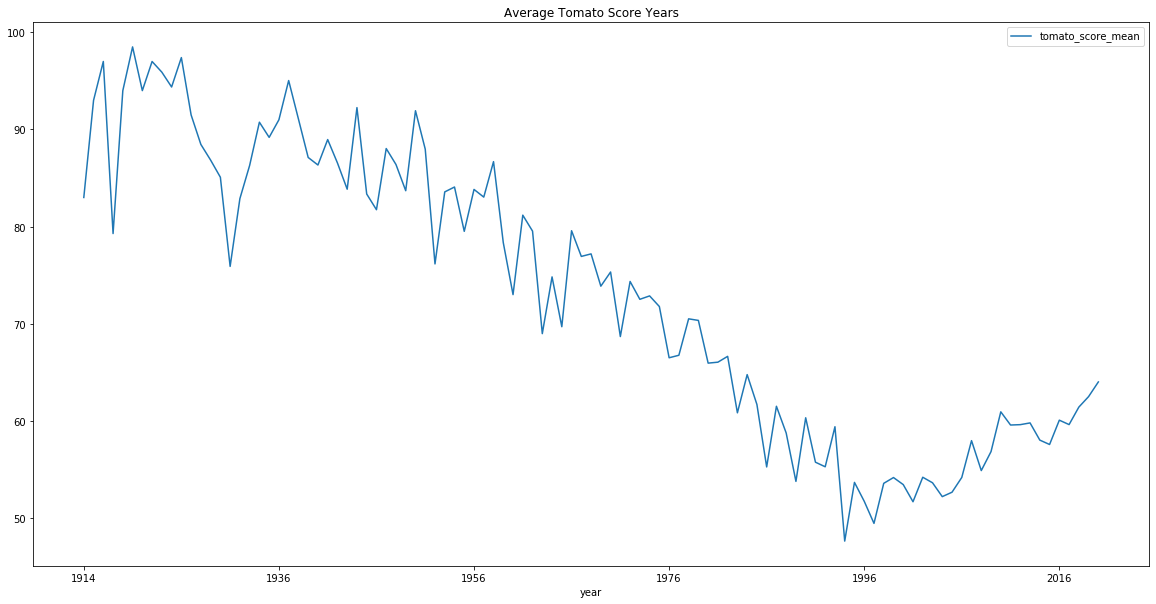

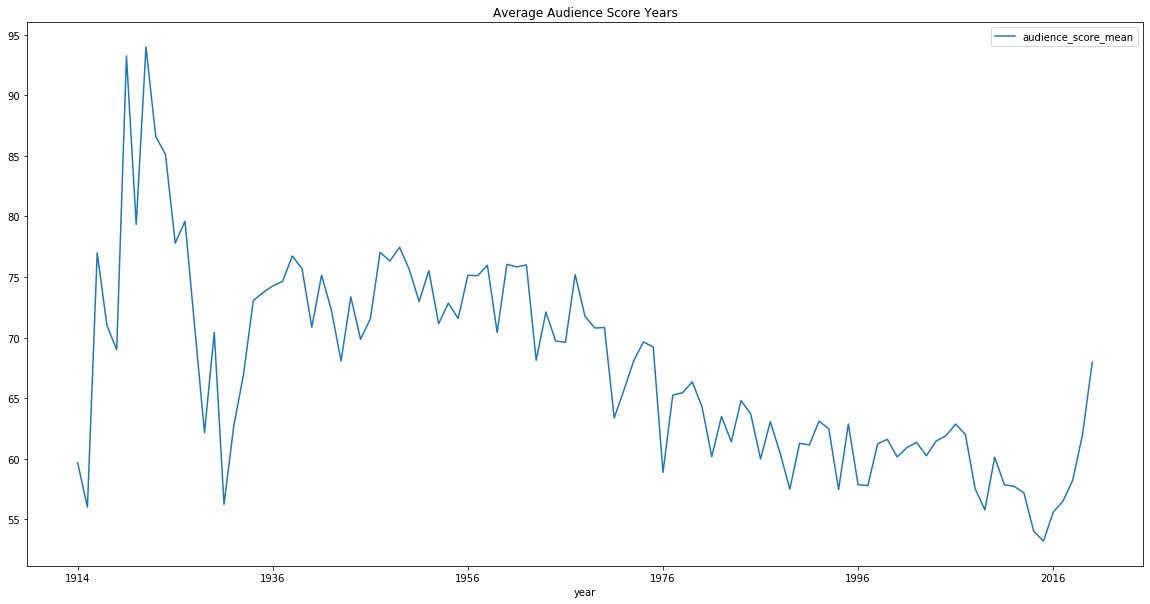

In [38]:
movieYearStats.plot(x='year',y='tomato_score_mean',kind='line',title='Average Tomato Score Years',figsize=(20,10))
movieYearStats.plot(x='year',y='audience_score_mean',kind='line',title='Average Audience Score Years',figsize=(20,10))